## Given:  
model data of 34 species + ODE with 2 unknowns h_10_TPplus, h_10_TPminus

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import tensorflow as tf

import models

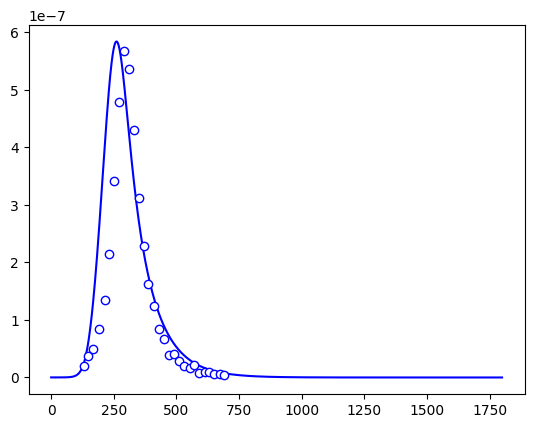

In [2]:
data = sio.loadmat("../../data/data_case_3.mat")
t_test = data["t"]
u_test = data["Y"] # scaling?

#name_list = ['TF','VII', 'TF:VII', 'VIIa', 'TF:VIIa', 'IX', 'IXa', 'IXm', 'IXam',
#'X', 'Xa', 'Xm', 'Xam', 'II', 'IIa', 'IIm', 'IIam', 'PL', 'AP', 'VIII', 'VIIIa', 'VIIIm',
#'VIIIam', 'VIIIam:IXam', 'V', 'Va', 'Vm', 'Vam', 'Xam:Vam', 'I', 'Ia', 'TFPI', 'Xa:TFPI', 'ATIII']

TIM = 1800
NDM = [0.025, 10.0, 0.005, 10.0, 0.005, 90.0, 90.0, 10.0, 10.0, 170.0,
       170.0, 10.0, 10.0, 1400.0, 1400.0, 10.0, 10.0, 10.0, 10.0,
       0.7, 0.7, 0.7, 0.7, 0.7, 20.0, 20.0, 10.0, 10.0, 10.0, 7000.0,
       7000.0, 2.5, 2.5, 3400.0] #nM

exp_data_1 = np.loadtxt("../../data/exp_data_case_3.dat").T
t_exp_1 = exp_data_1[0]
u_exp_1 = exp_data_1[1]

plt.plot(t_test * TIM, (u_test[:, 14] * NDM[14] + u_test[:, 16] * NDM[16]) * 1e-9, 'b', label='Model(No Inh)')
plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
plt.show()

In [3]:
np.max(data["Y"], axis=0)

array([1.00000000e+00, 1.00000000e+00, 4.54258697e+00, 5.41050264e-01,
       1.29888545e-01, 1.00000000e+00, 1.00000000e-04, 8.99075842e+00,
       8.99157588e-04, 1.00000000e+00, 6.52850980e-04, 1.69286597e+01,
       2.63365081e+00, 1.00000000e+00, 1.19242711e-02, 1.35988619e+02,
       5.67362069e+01, 1.00000000e+00, 1.00010020e+00, 1.00000000e+00,
       1.00000000e-04, 9.98889639e-01, 9.96740400e-01, 7.49224388e-03,
       1.00000000e+00, 1.07688723e-04, 1.99890385e+00, 1.94999777e+00,
       1.96262243e+00, 1.00000000e+00, 1.00010002e+00, 1.00000000e+00,
       9.95287924e-01, 1.00000000e+00])

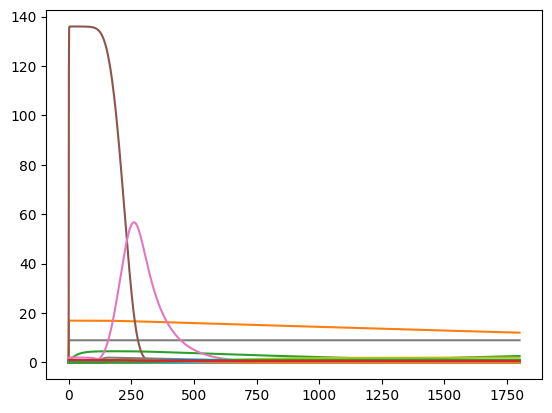

In [4]:
plt.plot(t_test * TIM, u_test)
plt.show()

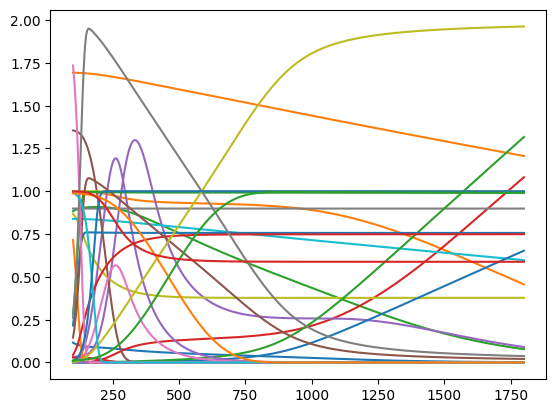

In [5]:
scale = np.array(
    [1, 1, 5, 0.5, 0.1, 1, 0.0001, 10, 0.001, 0.005, \
     0.001, 10, 2, 1, 0.01, 100, 100, 1, 1, 1, \
    0.0001, 1, 1, 0.01, 1, 0.0001, 1, 1, 1, 1, \
    1, 1, 1, 1]
).reshape([-1])

u_test = u_test / scale

plt.plot(t_test[100:] * TIM, u_test[100:, :])
plt.show()

In [10]:
np.max(u_test[200:, :], axis=0)

array([8.75883084e-02, 9.91105323e-01, 9.08292047e-01, 1.08210053e+00,
       1.29888545e+00, 1.02684171e-03, 2.85650236e-04, 8.99075838e-01,
       5.50173769e-01, 8.33198516e-01, 6.52850980e-01, 1.68057769e+00,
       1.31682541e+00, 1.87905048e-02, 1.19242711e+00, 8.91785827e-01,
       5.67362069e-01, 1.66307787e-19, 1.00010000e+00, 1.10565860e-10,
       7.58821500e-01, 1.44967602e-06, 9.95009158e-01, 7.49224388e-01,
       1.13102402e-12, 1.04211453e+00, 2.04775731e-08, 1.88703118e+00,
       1.96262243e+00, 4.09845275e-02, 1.00010002e+00, 9.64315408e-01,
       9.95287924e-01, 9.50291844e-01])

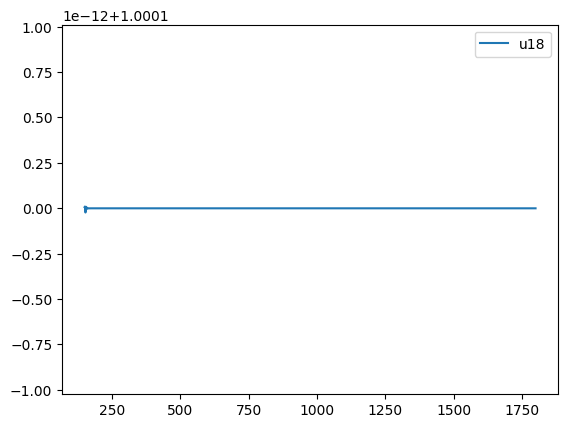

In [16]:
# plt.plot(t_test[100:] * TIM, u_test[100:, 4], label='u4')
# plt.plot(t_test[100:] * TIM, u_test[100:, 9], label='u9')
# plt.plot(t_test[100:] * TIM, u_test[100:, 10], label='u10')
# plt.plot(t_test[100:] * TIM, u_test[100:, 12], label='u12')
plt.plot(t_test[200:] * TIM, u_test[200:, 18], label='u18')
# plt.plot(t_test[100:] * TIM, u_test[100:, 31], label='u31')
# plt.plot(t_test[100:] * TIM, u_test[100:, 32], label='u32')
# plt.plot(t_test[100:] * TIM, u_test[100:, 33], label='u33')
plt.legend()
plt.show()

In [29]:
t_train = t_test[200:][::20] # discard first 200 fluctuant points
u_train = u_test[200:][::20]
f_train = np.zeros_like(u_train)

model = models.PINN(TIM, NDM, scale, eps=1e-6)

In [45]:
loss = model.train(t_train, f_train, t_train, u_train, eps=1e-7, niter=200000)
# print total loss, data loss, ode loss, eq10_loss,eq31_loss, eq32_loss, u4_loss, u9_loss, u10_loss, u12_loss, u18_loss, u31_loss, u32_loss, u33_loss

0 1.4615235e-06 1.4360728e-06 0.25450763 15336.133 0.05262811 0.048518214 3.365768e-07 2.9976317e-08 8.4015575e-08 2.0576157e-07 2.4122132e-08 2.4839142e-07 2.8974515e-07 2.1748392e-07
1000 5.7509537e-06 5.0904728e-06 6.6048098 642266.56 0.09459979 0.087544315 1.381896e-06 1.11487566e-07 2.1367967e-07 1.4467464e-06 3.44251e-07 4.034579e-07 5.265915e-07 6.6236265e-07
2000 2.1257479e-06 2.058821e-06 0.6692686 58385.074 0.04438926 0.04102862 6.076554e-07 7.4197914e-08 8.4112074e-08 2.4521233e-07 3.2655567e-08 3.6053444e-07 3.8014534e-07 2.7430795e-07
3000 1.9836953e-06 1.920977e-06 0.62718415 56051.477 0.03526454 0.031404875 5.587076e-07 2.8037627e-08 9.3602814e-08 3.928901e-07 2.6637016e-08 2.6403927e-07 3.3697265e-07 2.200899e-07
4000 6.9854163e-06 6.838319e-06 1.4709731 138646.3 0.044629104 0.039881114 1.8257387e-06 4.142059e-08 4.337706e-07 2.750523e-06 3.6477932e-08 5.036829e-07 7.8846716e-07 4.5823805e-07
5000 2.3530802e-06 2.322438e-06 0.3064231 20179.732 0.05323028 0.051395494 5.8

45000 3.9314486e-06 3.6010565e-06 3.3039198 322667.34 0.040500704 0.036745798 8.180187e-07 6.4394705e-08 6.227151e-07 1.0659443e-06 8.85347e-08 3.0126094e-07 3.9463163e-07 2.455565e-07
46000 6.900235e-05 6.725748e-05 17.448664 1729524.8 0.07733156 0.07608516 1.8418941e-05 6.184994e-07 4.651216e-06 3.5687102e-05 1.2708851e-07 2.8456896e-06 4.2721617e-06 6.3678056e-07
47000 1.2076592e-06 1.1875621e-06 0.20097075 13449.556 0.034810435 0.03166476 3.2602046e-07 2.3760709e-08 7.316823e-08 1.8783969e-07 1.3552964e-08 1.8288104e-07 2.1480822e-07 1.6553085e-07
48000 1.2210344e-06 1.1952869e-06 0.25747427 20602.686 0.027249675 0.024197748 3.3011176e-07 2.4673243e-08 7.738849e-08 1.8956815e-07 1.4851792e-08 1.8174671e-07 2.1192055e-07 1.650263e-07
49000 1.1260383e-05 6.3393863e-06 49.209965 4912500.5 0.043484386 0.041476313 7.358384e-07 3.613897e-08 2.2028246e-06 7.228228e-07 1.2563879e-06 3.5788136e-07 6.45516e-07 3.8197646e-07
50000 2.4533947e-06 2.1318363e-06 3.2155843 313708.9 0.040115736 0.0

89000 1.0261489e-06 1.0072076e-06 0.18941265 14631.423 0.02217663 0.020921811 3.236934e-07 3.143229e-08 5.5703666e-08 1.6573166e-07 1.5015472e-08 1.3026094e-07 1.4825227e-07 1.3711796e-07
90000 1.4356167e-06 1.4165884e-06 0.19028294 14332.216 0.02439099 0.022569785 3.9854083e-07 3.0602298e-08 1.123894e-07 4.4618787e-07 1.1747339e-08 1.3613308e-07 1.599214e-07 1.2106618e-07
91000 1.0009203e-06 9.81846e-07 0.19074307 13468.338 0.028482974 0.027576724 3.1509353e-07 2.4247283e-08 5.7165174e-08 1.7973939e-07 1.1328444e-08 1.3042673e-07 1.4311142e-07 1.2073419e-07
92000 9.799627e-07 9.642362e-07 0.1572654 8843.845 0.03485498 0.03397197 3.1397602e-07 2.1044553e-08 6.349378e-08 1.792139e-07 9.220031e-09 1.1840125e-07 1.3842076e-07 1.2046583e-07
93000 9.62409e-07 9.489484e-07 0.13460551 9174.931 0.02218574 0.020670468 3.115191e-07 2.4091682e-08 5.5710878e-08 1.612283e-07 9.521529e-09 1.1792853e-07 1.3879654e-07 1.3015188e-07
94000 2.3307693e-06 1.6458858e-06 6.848834 679472.5 0.027194088 0.0269

134000 7.7516114e-07 7.646308e-07 0.10530343 6518.8457 0.020286685 0.019828288 2.9084327e-07 1.525935e-08 4.7456222e-08 1.4547449e-07 8.001904e-09 8.0376914e-08 9.229553e-08 8.4923094e-08
135000 1.7554993e-06 1.6983988e-06 0.571005 45166.484 0.0598844 0.05945573 3.2159488e-07 1.7504766e-08 1.2998694e-07 6.724138e-07 9.956037e-09 2.5162666e-07 2.092416e-07 8.607402e-08
136000 5.152352e-06 4.529289e-06 6.2306285 616756.7 0.03175432 0.03130745 3.8489074e-07 7.647942e-07 2.7446734e-07 2.764227e-07 4.065542e-07 1.1065149e-07 2.5934045e-07 2.052168e-06
137000 1.267343e-05 9.264882e-06 34.08549 3400511.5 0.04001624 0.040359184 1.3409207e-06 1.614065e-07 2.0239693e-07 6.090358e-06 5.3854296e-07 3.3297937e-07 3.5130927e-07 2.4696777e-07
138000 2.911114e-06 2.8911918e-06 0.19922286 15775.767 0.020613853 0.020851351 8.4138924e-07 3.2568084e-07 2.0528155e-07 6.9765287e-07 2.1269736e-08 1.6179759e-07 1.8256095e-07 4.5555916e-07
139000 8.3713724e-07 8.250287e-07 0.121085845 5875.7344 0.031142985 0.0

179000 1.8295457e-06 1.728775e-06 1.0077065 90319.78 0.052131776 0.052376937 4.7362118e-07 1.9391585e-08 5.0644765e-08 4.5049495e-07 9.195079e-09 3.3960998e-07 2.7842034e-07 1.07397156e-07
180000 3.3947256e-06 3.3338908e-06 0.60834795 45449.617 0.07689706 0.07695469 1.50654e-06 8.735748e-08 1.33195e-07 5.858583e-07 4.0523986e-08 5.539819e-07 2.7797017e-07 1.4846414e-07
181000 7.0559344e-07 6.955524e-07 0.100410715 6033.6445 0.019766165 0.0203081 2.7604082e-07 1.5106878e-08 4.7355666e-08 1.531341e-07 9.015671e-09 6.595899e-08 7.026835e-08 5.867191e-08
182000 9.844493e-07 9.465494e-07 0.37899965 32370.531 0.02756596 0.027728364 2.822851e-07 2.664387e-08 1.1479376e-07 2.734479e-07 1.5253528e-08 7.985506e-08 8.859771e-08 6.567243e-08
183000 6.335722e-07 6.2514596e-07 0.08426235 4092.8865 0.021279223 0.022054259 2.5890301e-07 1.1268373e-08 3.8747118e-08 1.2644644e-07 9.387558e-09 6.159768e-08 6.360122e-08 5.519455e-08
184000 6.6507147e-07 6.3457196e-07 0.3049951 26106.543 0.021621536 0.0223

In [46]:
model.restore()
u_pred = model.call(tf.constant(t_test, tf.float32)).numpy()

In [47]:
# plt.plot(t_test * TIM, (u_pred[:, 14] * NDM[14] * scale[14] + u_pred[:, 16] * NDM[16] * scale[16]) * 1e-9, '--', label='Model(No Inh)')
# plt.plot(t_train * TIM, (u_train[:, 14] * NDM[14] * scale[14] + u_train[:, 16] * NDM[16] * scale[16]) * 1e-9, label='Model(No Inh)')
# plt.plot(t_exp_1, u_exp_1, 'bo', markerfacecolor='w', label='Exp')
# plt.show()

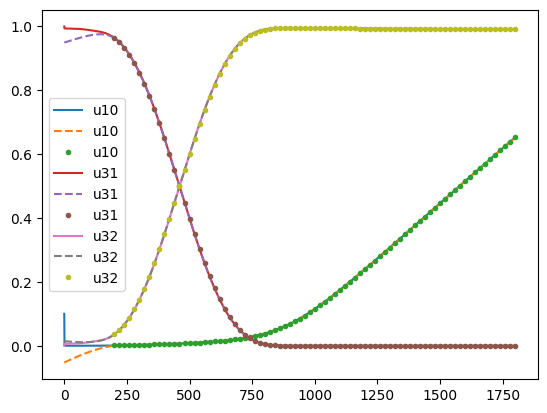

In [48]:
plt.plot(t_test * TIM, u_test[:, 10], label='u10')
plt.plot(t_test * TIM, u_pred[:, 10], '--', label='u10')
plt.plot(t_train * TIM, u_train[:, 10], '.', label='u10')
plt.plot(t_test * TIM, u_test[:, 31], label='u31')
plt.plot(t_test * TIM, u_pred[:, 31], '--', label='u31')
plt.plot(t_train * TIM, u_train[:, 31], '.', label='u31')
plt.plot(t_test * TIM, u_test[:, 32], label='u32')
plt.plot(t_test * TIM, u_pred[:, 32], '--', label='u32')
plt.plot(t_train * TIM, u_train[:, 32], '.', label='u32')
plt.legend()
plt.show()

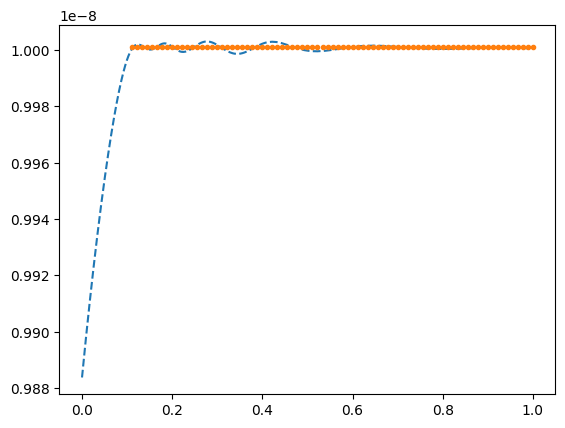

In [49]:
j = 18
plt.plot(t_test, u_pred[:, j] * NDM[j] * scale[j] * 1e-9, '--')
plt.plot(t_train, u_train[:, j] * NDM[j] * scale[j] * 1e-9, ".")
plt.show()

In [50]:
# plt.plot(t_test * TIM, u_pred[:, 16] * NDM[16] * scale[16] * 1e-9, '--')
# plt.plot(t_train * TIM, u_train[:, 16] * NDM[16] * scale[16] * 1e-9)
# plt.show()

In [51]:
# h_10_TPplus = 4.381
# h_10_TPminus = 5.293 * 1e-8
# h_2 = 1.79 * 1e-4
print("h_10_TPplus:", tf.math.exp(model.log_h_10_TPplus).numpy())
print("h_10_TPminus:",  tf.math.exp(model.log_h_10_TPminus).numpy())
# print("h_2:", model.h_2.numpy())

h_10_TPplus: 4.3473735
h_10_TPminus: 9.022583e-06
